In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file = "/content/New_Data.csv"
df = pd.read_csv(file)

In [3]:
df.head()

,Gender,Age,Openness,Neuroticism,Conscientiousness,Agreeableness,Extraversion,Personality (Class label)
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively


In [4]:
df.head()

,Gender,Age,Openness,Neuroticism,Conscientiousness,Agreeableness,Extraversion,Personality (Class label)
0,Male,17,7,4,7,3,2,extraverted
1,Male,19,4,5,4,6,6,serious
2,Female,18,7,6,4,5,5,dependable
3,Female,22,5,6,7,4,3,extraverted
4,Female,19,7,4,6,5,4,lively


In [5]:
print(df.info())
print("----"*30)
print(df.describe().T)
print("----"*30)
print(df["Personality (Class label)"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6024 entries, 0 to 6023
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Gender                     6024 non-null   object
 1   Age                        6024 non-null   int64 
 2   Openness                   6024 non-null   int64 
 3   Neuroticism                6024 non-null   int64 
 4   Conscientiousness          6024 non-null   int64 
 5   Agreeableness              6024 non-null   int64 
 6   Extraversion               6024 non-null   int64 
 7   Personality (Class label)  6024 non-null   object
dtypes: int64(6), object(2)
memory usage: 376.6+ KB
None
------------------------------------------------------------------------------------------------------------------------
                    count       mean        std  min   25%   50%   75%   max
Age                6024.0  37.474104  14.651024  5.0  23.0  37.0  50.0  64.0
Openness    

## Data Visualization

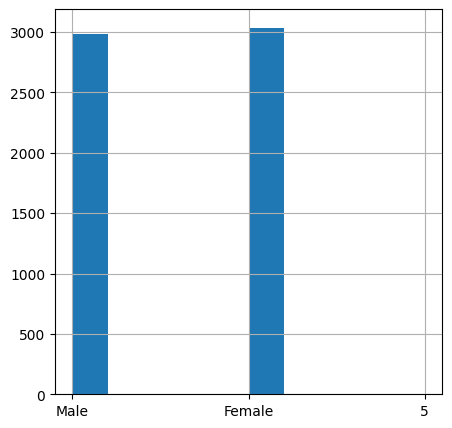

In [8]:
df["Gender"].hist(figsize=(5,5))
plt.show()

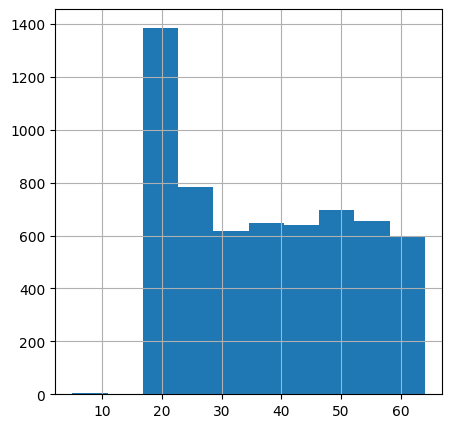

In [9]:
df["Age"].hist(figsize=(5,5))
plt.show()

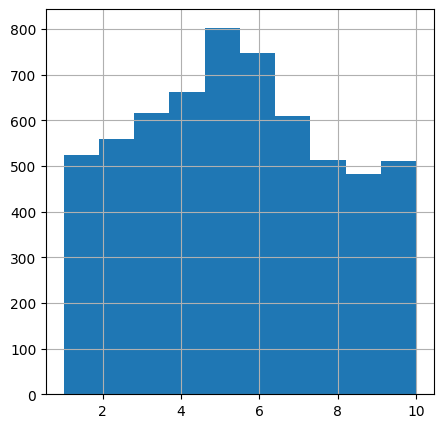

In [10]:
df["Openness"].hist(figsize=(5,5))
plt.show()

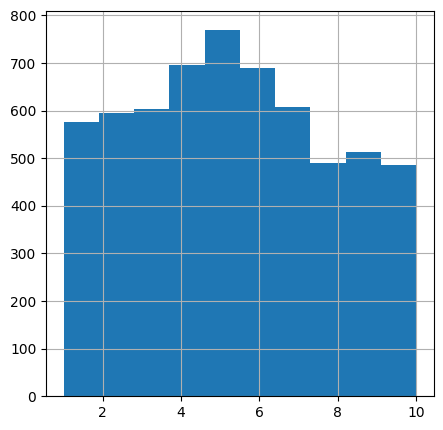

In [11]:
df["Neuroticism"].hist(figsize=(5,5))
plt.show()

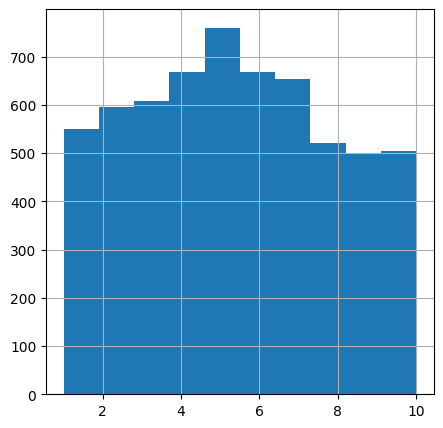

In [12]:
df["Conscientiousness"].hist(figsize=(5,5))
plt.show()

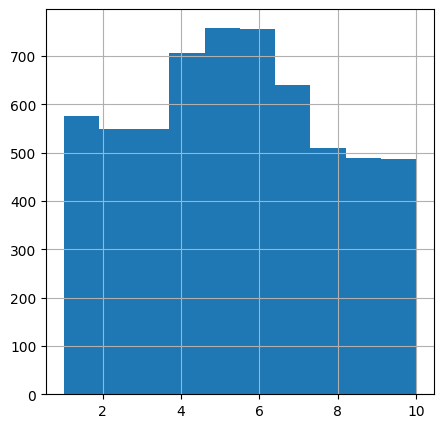

In [13]:
df["Agreeableness"].hist(figsize=(5,5))
plt.show()

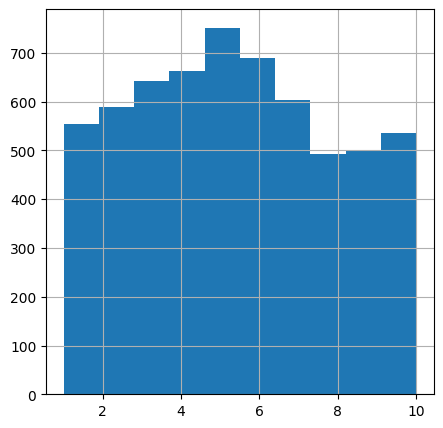

In [14]:
df["Extraversion"].hist(figsize=(5,5))
plt.show()

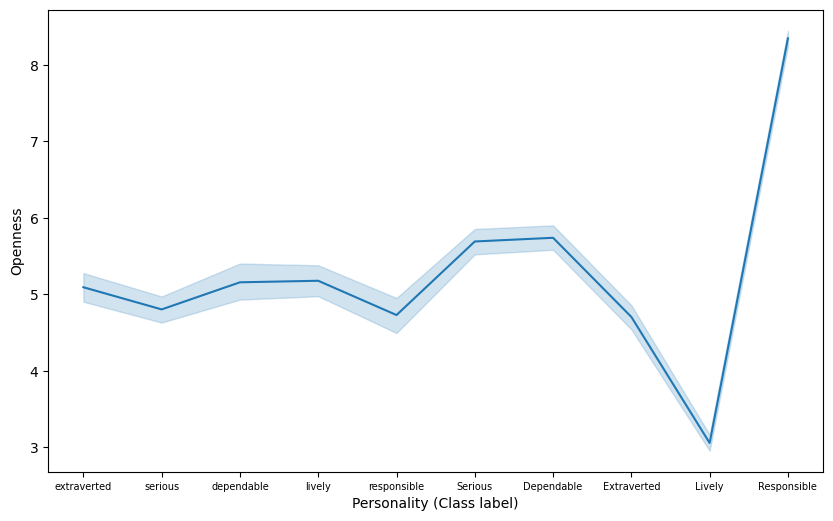

In [15]:
plt.figure(figsize=(10, 6))
plot = sns.lineplot(x="Personality (Class label)", y="Openness", data=df)
plot.tick_params(axis='x', labelsize=7)
plt.show()

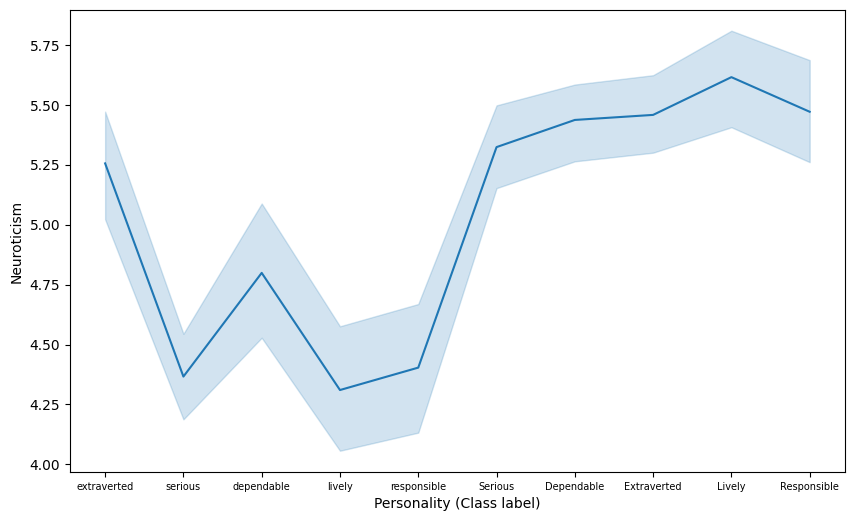

In [16]:
plt.figure(figsize=(10, 6))
plot = sns.lineplot(x="Personality (Class label)", y="Neuroticism", data=df)
plot.tick_params(axis='x', labelsize=7)
plt.show()

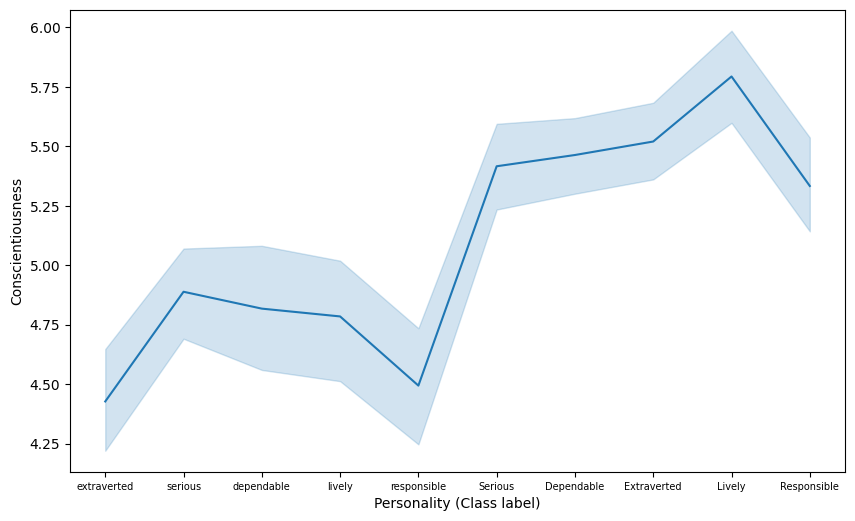

In [17]:
plt.figure(figsize=(10, 6))
plot = sns.lineplot(x="Personality (Class label)", y="Conscientiousness", data=df)
plot.tick_params(axis='x', labelsize=7)
plt.show()

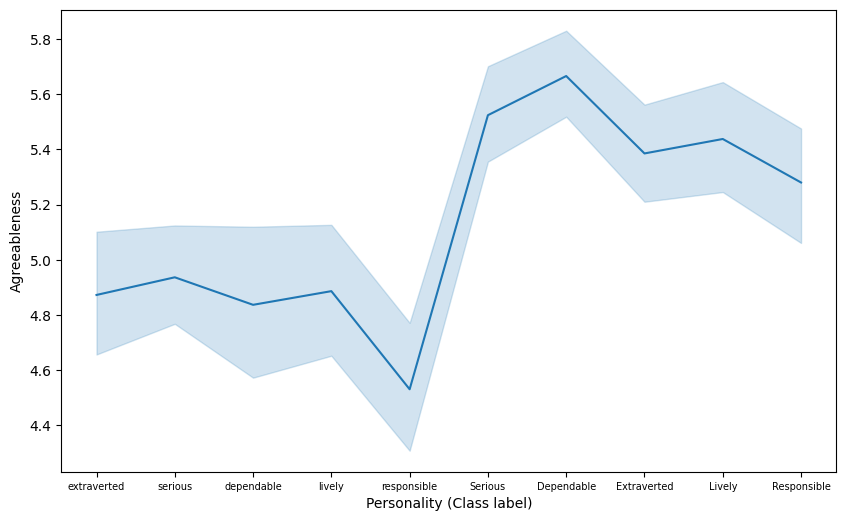

In [18]:
plt.figure(figsize=(10, 6))
plot = sns.lineplot(x="Personality (Class label)", y="Agreeableness", data=df)
plot.tick_params(axis='x', labelsize=7)
plt.show()

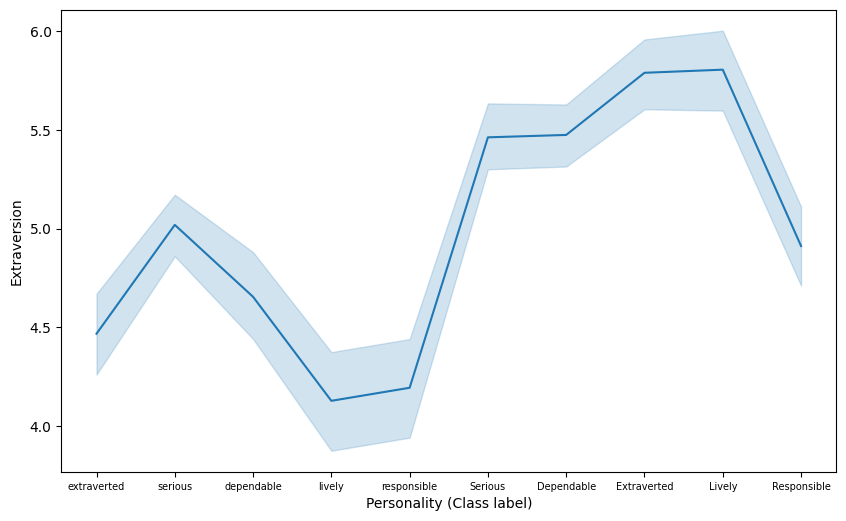

In [19]:
plt.figure(figsize=(10, 6))
plot = sns.lineplot(x="Personality (Class label)", y="Extraversion", data=df)
plot.tick_params(axis='x', labelsize=7)
plt.show()

## Corelation Visualization

<ipython-input-20-361b70695b6c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Figure size 1000x800 with 0 Axes>

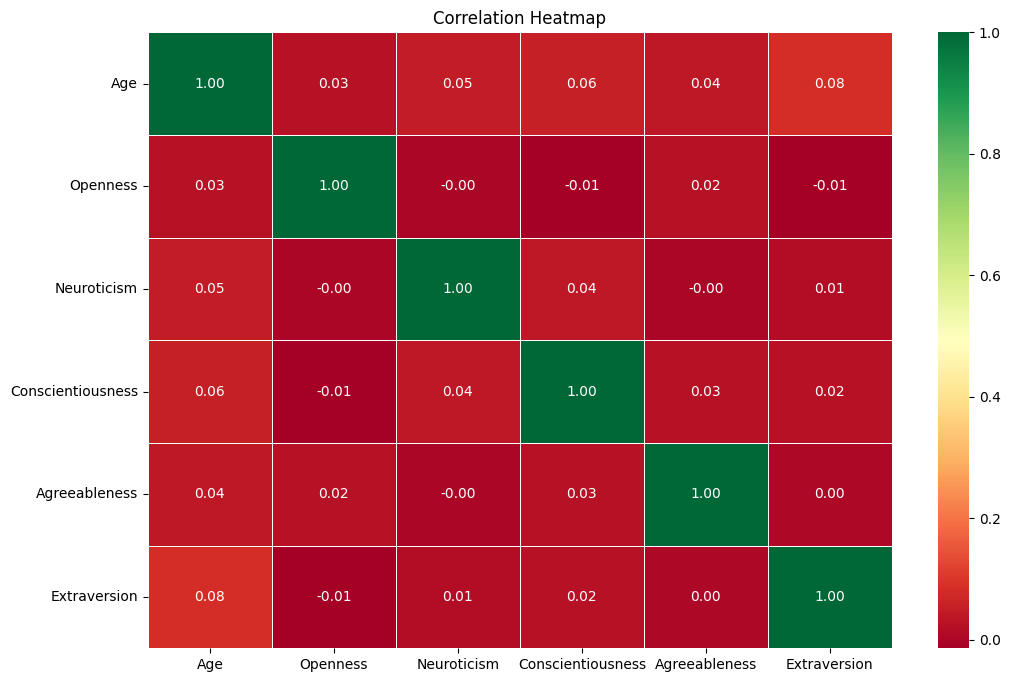

In [20]:
fig = plt.figure(figsize=(10,8))
# Assuming df is your DataFrame
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', fmt=".2f", linewidths=.5)

plt.title("Correlation Heatmap")
plt.show()

## Label Encoding

In [21]:
encode = LabelEncoder()
columns = ["Gender","Personality (Class label)"]
for i in columns:
    print(df[i].value_counts())
    print("----"*30)
    df[i] = encode.fit_transform(df[i])
    print(df[i].value_counts())
    print("----"*30)

Female    3036
Male      2987
5            1
Name: Gender, dtype: int64
------------------------------------------------------------------------------------------------------------------------
1    3036
2    2987
0       1
Name: Gender, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Dependable     1193
Extraverted    1136
Serious        1110
Lively          790
Responsible     771
serious         314
extraverted     227
responsible     166
dependable      159
lively          158
Name: Personality (Class label), dtype: int64
------------------------------------------------------------------------------------------------------------------------
0    1193
1    1136
4    1110
2     790
3     771
9     314
6     227
8     166
5     159
7     158
Name: Personality (Class label), dtype: int64
--------------------------------------------------------------------------------------------------------------------

In [22]:
# encode = LabelEncoder()
# columns = ["Personality (Class label)"]
# for i in columns:
#     print(df[i].value_counts())
#     print("----"*30)
#     df[i] = encode.fit_transform(df[i])
#     print(df[i].value_counts())
#     print("----"*30)

# Personality


*   Dependable - 0
*   Extraverted - 1
*   Lively - 2
*   Responsible - 3
*   Serious - 4

# Gender
* Male - 0
* Female - 1


# Splitting Data

In [23]:
x = df.drop("Personality (Class label)",axis=1)
y = df["Personality (Class label)"]
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.2,random_state=123)

## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, f1_score, precision_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=123)

# Fit the model to the training data
rf_classifier.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred, average='weighted')
recall = recall_score(Y_test, y_pred, average='weighted')
f1 = f1_score(Y_test, y_pred, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Accuracy: 0.8340248962655602
Precision: 0.8254740200738798
Recall: 0.8340248962655602
F1-Score: 0.8284770490560837


## XGBoost

In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(random_state=123)

# Fit the model to the training data
xgb_classifier.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_xgb = xgb_classifier.predict(X_test)

# Evaluate the performance of the XGBoost model
accuracy_xgb = accuracy_score(Y_test, y_pred_xgb)
precision_xgb = precision_score(Y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(Y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(Y_test, y_pred_xgb, average='weighted')

# Print the results for XGBoost
print("XGBoost - Accuracy:", accuracy_xgb)
print("XGBoost - Precision:", precision_xgb)
print("XGBoost - Recall:", recall_xgb)
print("XGBoost - F1-Score:", f1_xgb)

XGBoost - Accuracy: 0.8307053941908714
XGBoost - Precision: 0.8289577176723772
XGBoost - Recall: 0.8307053941908714
XGBoost - F1-Score: 0.8292153304896666


## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=123)

# Fit the model to the training data
dt_classifier.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the performance of the Decision Tree model
accuracy_dt = accuracy_score(Y_test, y_pred_dt)
precision_dt = precision_score(Y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(Y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(Y_test, y_pred_dt, average='weighted')

# Print the results for Decision Tree
print("Decision Tree - Accuracy:", accuracy_dt)
print("Decision Tree - Precision:", precision_dt)
print("Decision Tree - Recall:", recall_dt)
print("Decision Tree - F1-Score:", f1_dt)


Decision Tree - Accuracy: 0.8265560165975103
Decision Tree - Precision: 0.8304839643224374
Decision Tree - Recall: 0.8265560165975103
Decision Tree - F1-Score: 0.8284170573143889


# KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Fit the model to the training data
knn_classifier.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Evaluate the performance of the KNN model
accuracy_knn = accuracy_score(Y_test, y_pred_knn)
precision_knn = precision_score(Y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(Y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(Y_test, y_pred_knn, average='weighted')

# Print the results for KNN
print("KNN - Accuracy:", accuracy_knn)
print("KNN - Precision:", precision_knn)
print("KNN - Recall:", recall_knn)
print("KNN - F1-Score:", f1_knn)

KNN - Accuracy: 0.791701244813278
KNN - Precision: 0.7852087611662578
KNN - Recall: 0.791701244813278
KNN - F1-Score: 0.7879817204082608


## Gaussian Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the model to the training data
nb_classifier.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the performance of the Gaussian Naive Bayes model
accuracy_nb = accuracy_score(Y_test, y_pred_nb)
precision_nb = precision_score(Y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(Y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(Y_test, y_pred_nb, average='weighted')

# Print the results for Gaussian Naive Bayes
print("Gaussian Naive Bayes - Accuracy:", accuracy_nb)
print("Gaussian Naive Bayes - Precision:", precision_nb)
print("Gaussian Naive Bayes - Recall:", recall_nb)
print("Gaussian Naive Bayes - F1-Score:", f1_nb)


Gaussian Naive Bayes - Accuracy: 0.8398340248962656
Gaussian Naive Bayes - Precision: 0.8151894745601581
Gaussian Naive Bayes - Recall: 0.8398340248962656
Gaussian Naive Bayes - F1-Score: 0.8209116461358482


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state=123, max_iter=1000)

# Fit the model to the training data
logreg_classifier.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_logreg = logreg_classifier.predict(X_test)

# Evaluate the performance of the Logistic Regression model
accuracy_logreg = accuracy_score(Y_test, y_pred_logreg)
precision_logreg = precision_score(Y_test, y_pred_logreg, average='weighted',zero_division=1)
recall_logreg = recall_score(Y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(Y_test, y_pred_logreg, average='weighted')

# Print the results for Logistic Regression
print("Logistic Regression - Accuracy:", accuracy_logreg)
print("Logistic Regression - Precision:", precision_logreg)
print("Logistic Regression - Recall:", recall_logreg)
print("Logistic Regression - F1-Score:", f1_logreg)

Logistic Regression - Accuracy: 0.8049792531120332
Logistic Regression - Precision: 0.801720129695376
Logistic Regression - Recall: 0.8049792531120332
Logistic Regression - F1-Score: 0.7675983731673061


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Neural Network for classification (MLPClassifier)

In [30]:
from sklearn.neural_network import MLPClassifier

# Initialize the Neural Network classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Fit the model to the training data
mlp_classifier.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_mlp = mlp_classifier.predict(X_test)

# Evaluate the performance of the Neural Network model
accuracy_mlp = accuracy_score(Y_test, y_pred_mlp)
precision_mlp = precision_score(Y_test, y_pred_mlp, average='weighted')
recall_mlp = recall_score(Y_test, y_pred_mlp, average='weighted')
f1_mlp = f1_score(Y_test, y_pred_mlp, average='weighted')

# Print the results for the Neural Network
print("Neural Network - Accuracy:", accuracy_mlp)
print("Neural Network - Precision:", precision_mlp)
print("Neural Network - Recall:", recall_mlp)
print("Neural Network - F1-Score:", f1_mlp)


Neural Network - Accuracy: 0.8224066390041493
Neural Network - Precision: 0.8105349624263777
Neural Network - Recall: 0.8224066390041493
Neural Network - F1-Score: 0.8137474252469614


## Support Vector Machine for classification (SVC)

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

# Standardize the data (SVMs are sensitive to the scale of features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Fit the model to the training data
svm_classifier.fit(X_train_scaled, Y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Evaluate the performance of the SVM model
accuracy_svm = accuracy_score(Y_test, y_pred_svm)
precision_svm = precision_score(Y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(Y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(Y_test, y_pred_svm, average='weighted')

# Print the results for SVM
print("SVM - Accuracy:", accuracy_svm)
print("SVM - Precision:", precision_svm)
print("SVM - Recall:", recall_svm)
print("SVM - F1-Score:", f1_svm)


SVM - Accuracy: 0.8116182572614108
SVM - Precision: 0.7787781935228125
SVM - Recall: 0.8116182572614108
SVM - F1-Score: 0.789819768800992


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## AdaBoost (Adaptive Boosting)

This is an ensemble learning method with 'DecisionTreeClassifier' as base model

In [33]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the base model (weak learner)
base_model = DecisionTreeClassifier(max_depth=3)

# Initialize the AdaBoost classifier with the base model
adaboost_classifier = AdaBoostClassifier(base_model, n_estimators=50, random_state=42)

# Fit the model to the training data
adaboost_classifier.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_adaboost = adaboost_classifier.predict(X_test)

# Evaluate the performance of the AdaBoost model
accuracy_adaboost = accuracy_score(Y_test, y_pred_adaboost)
precision_adaboost = precision_score(Y_test, y_pred_adaboost, average='weighted')
recall_adaboost = recall_score(Y_test, y_pred_adaboost, average='weighted')
f1_adaboost = f1_score(Y_test, y_pred_adaboost, average='weighted')

# Print the results for AdaBoost
print("AdaBoost - Accuracy:", accuracy_adaboost)
print("AdaBoost - Precision:", precision_adaboost)
print("AdaBoost - Recall:", recall_adaboost)
print("AdaBoost - F1-Score:", f1_adaboost)


AdaBoost - Accuracy: 0.7900414937759336
AdaBoost - Precision: 0.8005320781409211
AdaBoost - Recall: 0.7900414937759336
AdaBoost - F1-Score: 0.7891805888449791


## Comparision

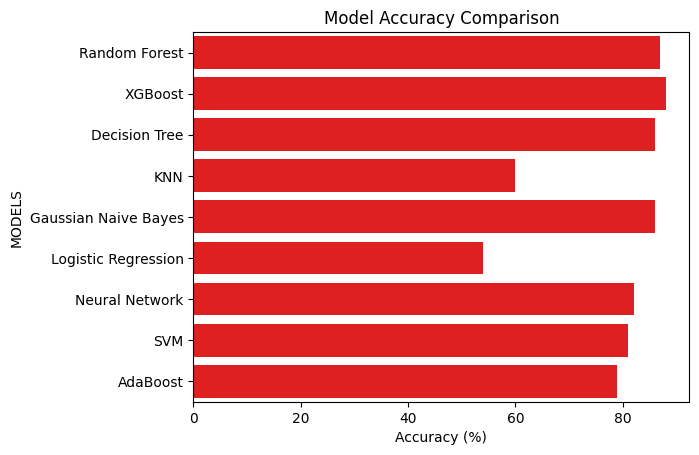

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd  # Make sure to import pandas

model_names = ["Random Forest", "XGBoost", "Decision Tree", "KNN", "Gaussian Naive Bayes", "Logistic Regression","Neural Network", "SVM", "AdaBoost"]
accuracies = [87, 88, 86, 60, 86, 54, 82, 81, 79]  # Use numerical values instead of strings

# Create a DataFrame from the lists
results_df = pd.DataFrame({"MODELS": model_names, "ACC": accuracies})

# Convert the "ACC" column to numeric type
results_df["ACC"] = pd.to_numeric(results_df["ACC"])

# Plot the bar plot
sns.barplot(x="ACC", y="MODELS", data=results_df, color="r")
plt.xlabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.show()


**XGBoost** is the best performing model.